## Linear Regression Assumptions

##### Import Modules

In [8]:
# module imports
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as tts
from joblib import load, dump

##### Read in csv to Pandas DataFrame

In [9]:
# read in csv to pd df
dataset = pd.read_csv('monthlydata.csv')

# set date as index
df = dataset.set_index(dataset['date'])

# remove extra columns
df.drop(columns=['VGT', 'VIS', 'VHT', 'VFH', 'VCR', 'date', 'Consumer Price Index for all Urban Consumers', 'Real Gross Domestic Product'], inplace=True)

# split df into X and y
X = df.drop(columns='VTI').copy()
y = df['VTI'].copy()

## Check Linear Regression Assumptions
### Check Multicollinearity with VIF

##### Following along with https://etav.github.io/python/vif_factor_python.html, https://www.statology.org/how-to-calculate-vif-in-python/

In [10]:
# module imports
from patsy import dmatrices
from patsy.builtins import Q
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
df.head()

,10-Year Treasury Constant Maturity Rate,Inflation Expectations,Consumer Sentiment & Consumer Confidence,Advance Retail Sales: Retail Trade,Unemployment Rate,VTI
date,,,,,,
2006-01-01,4.42,3.0,91.2,286152.0,4.7,127.30
2006-02-01,4.57,3.0,86.7,282417.0,4.8,127.58
2006-03-01,4.72,3.0,88.9,326153.0,4.7,129.67
2006-04-01,4.99,3.3,87.4,316526.0,4.7,130.91
2006-05-01,5.11,4.0,79.1,337393.0,4.6,126.69


In [12]:
# find design matrix for linear regression model using 'VTI' as response variable 
y_vif, X_vif = dmatrices("VTI ~ + Q('10-Year Treasury Constant Maturity Rate') + \
    Q('Inflation Expectations') + Q('Consumer Sentiment & Consumer Confidence') + \
    Q('Advance Retail Sales: Retail Trade') + Q('Unemployment Rate')", data=df, return_type='dataframe')

# calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['variable'] = X_vif.columns

# view VIF for each explanatory variable 
vif

# -> removed Consumer Price Index for all Urban Consumers due to multicollinearity

,VIF,variable
0,477.861592,Intercept
1,2.547205,Q('10-Year Treasury Constant Maturity Rate')
2,1.937867,Q('Inflation Expectations')
3,3.348977,Q('Consumer Sentiment & Consumer Confidence')
4,2.985247,Q('Advance Retail Sales: Retail Trade')
5,2.776799,Q('Unemployment Rate')


### Check Distribution with Q-Q Plot
##### https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/

In [13]:
# imports
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


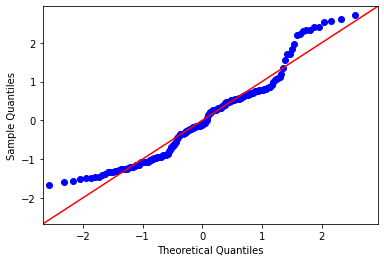

In [14]:
qq = sm.qqplot(y,line='45',fit=True,dist=stats.norm)